In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import cv2
import os

In [ ]:
import os

# List all files in a directory
directory1 = '/content/TrafficDataset/Positive_pictures'
directory2 = '/content/TrafficDataset/Negative_pictures/'

positive_image_paths = os.listdir(directory1)
negative_image_paths = os.listdir(directory2)

print(len(positive_image_paths))
print(len(negative_image_paths))



FileNotFoundError: ignored

In [ ]:
# Define image size and number of classes

img_width, img_height = 300, 300
num_classes = 2

In [ ]:
import os
# Set the path to the training and validation folders
train_folder = '/content/TrafficDataset/training_folder'
valid_folder = '/content/TrafficDataset/validation_folder'

# Create the training and validation folders if they don't exist
if not os.path.exists(train_folder):
    # os.makedirs(train_folder)
    os.makedirs(train_folder + '/positive')
    os.makedirs(train_folder + '/negative')
if not os.path.exists(valid_folder):
    # os.makedirs(valid_folder)
    os.makedirs(valid_folder + '/positive')
    os.makedirs(valid_folder + '/negative')



In [ ]:
# Set the percentage of images to use for training
train_pct = 0.8

In [ ]:
import shutil
# Loop through the positive images and copy them to the training and validation folders
for filename in positive_image_paths:
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.bmp'):
        if hash(filename) % 100 < train_pct * 100:
            shutil.copy(os.path.join(directory1, filename), os.path.join(train_folder + '/positive', filename))
        else:
            shutil.copy(os.path.join(directory1, filename), os.path.join(valid_folder + '/positive', filename))

# Loop through the negative images and copy them to the training and validation folders
for filename in negative_image_paths:
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.bmp'):
        if hash(filename) % 100 < train_pct * 100:
            shutil.copy(os.path.join(directory2, filename), os.path.join(train_folder + '/negative', filename))
        else:
            shutil.copy(os.path.join(directory2, filename), os.path.join(valid_folder + '/negative', filename))

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define data generators for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    preprocessing_function=lambda x: np.dot(x[...,:3], [0.299, 0.587, 0.114])
    )
val_datagen = ImageDataGenerator(rescale=1/255.0,
    preprocessing_function=lambda x: np.dot(x[...,:3], [0.299, 0.587, 0.114])
    )

In [ ]:
# Create data generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')
val_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

Found 403 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(320, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
cnn_model = model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the data generators
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator))

Epoch 1/15
26/26 [==============================] - 112s 4s/step - loss: 0.6771 - accuracy: 0.6526 - val_loss: 0.3777 - val_accuracy: 0.8947
Epoch 2/15
26/26 [==============================] - 106s 4s/step - loss: 0.3323 - accuracy: 0.8685 - val_loss: 0.3266 - val_accuracy: 0.8684
Epoch 3/15
26/26 [==============================] - 110s 4s/step - loss: 0.3163 - accuracy: 0.8958 - val_loss: 0.2522 - val_accuracy: 0.9123
Epoch 4/15
26/26 [==============================] - 110s 4s/step - loss: 0.2466 - accuracy: 0.9082 - val_loss: 0.1653 - val_accuracy: 0.9211
Epoch 5/15
26/26 [==============================] - 109s 4s/step - loss: 0.2311 - accuracy: 0.9132 - val_loss: 0.2778 - val_accuracy: 0.8947
Epoch 6/15
26/26 [==============================] - 108s 4s/step - loss: 0.1703 - accuracy: 0.9206 - val_loss: 0.6168 - val_accuracy: 0.8772
Epoch 7/15
26/26 [==============================] - 110s 4s/step - loss: 0.1879 - accuracy: 0.9355 - val_loss: 0.4365 - val_accuracy: 0.9123
Epoch 8/15
26

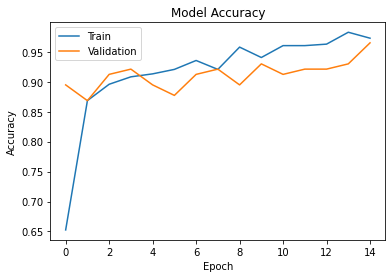

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


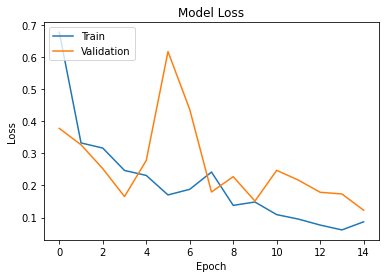

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on test data
test_data_dir = 'path/to/test/data'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)